<a href="https://colab.research.google.com/github/lacykaltgr/ait-assessments/blob/main/07_AIT_TensorBoard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Copyright

<PRE>
Copyright (c) 2023 Bálint Gyires-Tóth - All Rights Reserved
You may use and modify this code for research and development purpuses.
Using this code for educational purposes (self-paced or instructor led) without the permission of the author is prohibited.
</PRE>

# TensorBoard 
This notebook gives you a short overview of [TensorBoard](https://www.tensorflow.org/tensorboard). The functionality of TensorBoard is very rich, we will cover the most essential parts only.

As a first step, let's train a model, as we did before, on the CIFAR10 dataset.

In [ ]:
# imports 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Dropout
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [ ]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
flattened_dim = np.prod(X_train.shape[1:])

In [ ]:
# reshape 3D tensors to 2D tensors
X_train = X_train.reshape(-1, flattened_dim)
X_test = X_test.reshape(-1, flattened_dim)

# it is in int8 format, the neural network requires float32
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [ ]:
# train, valid, test split
train_ratio  = 0.8
train_length = X_train.shape[0]
train_split  = int(train_ratio*train_length)
X_valid, Y_valid = X_train[train_split:], Y_train[train_split:]
X_train, Y_train = X_train[:train_split], Y_train[:train_split]

In [ ]:
# standardization
mean = X_train.mean(axis=0)
std  = X_train.std(axis=0)
X_train = (X_train-mean)/std
X_valid = (X_valid-mean)/std
X_test  = (X_test-mean)/std

In [ ]:
# one-hot encoding
nb_classes = len(np.unique(Y_train))
Y_train = to_categorical(Y_train, nb_classes)
Y_valid = to_categorical(Y_valid, nb_classes)
Y_test  = to_categorical(Y_test, nb_classes)

In [ ]:
# callbacks
tb = TensorBoard(log_dir='logs', histogram_freq=0, write_graph=0)
es = EarlyStopping(patience=5, restore_best_weights=True, verbose=1, monitor='val_accuracy')

In [ ]:
# model definition with dropout
model = Sequential()
model.add(Dense(1024, activation='relu', kernel_initializer=HeNormal(), input_shape=(flattened_dim,)))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_initializer=HeNormal()))
model.add(Dense(nb_classes, activation='softmax'))

# loss function and optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# training
network_history = model.fit(X_train, Y_train, 
                            validation_data=(X_valid,Y_valid),
                            batch_size=128,                             
                            epochs=400000, 
                            verbose=1, 
                            callbacks=[tb,es])

Epoch 1/400000
313/313 [==============================] - 9s 6ms/step - loss: 1.9479 - accuracy: 0.3744 - val_loss: 1.6253 - val_accuracy: 0.4273
Epoch 2/400000
313/313 [==============================] - 2s 5ms/step - loss: 1.5425 - accuracy: 0.4546 - val_loss: 1.5135 - val_accuracy: 0.4655
Epoch 3/400000
313/313 [==============================] - 2s 5ms/step - loss: 1.4449 - accuracy: 0.4906 - val_loss: 1.4962 - val_accuracy: 0.4743
Epoch 4/400000
313/313 [==============================] - 2s 5ms/step - loss: 1.3722 - accuracy: 0.5156 - val_loss: 1.4707 - val_accuracy: 0.4837
Epoch 5/400000
313/313 [==============================] - 2s 5ms/step - loss: 1.3186 - accuracy: 0.5325 - val_loss: 1.4455 - val_accuracy: 0.4953
Epoch 6/400000
313/313 [==============================] - 2s 5ms/step - loss: 1.2607 - accuracy: 0.5548 - val_loss: 1.4500 - val_accuracy: 0.4952
Epoch 7/400000
313/313 [==============================] - 2s 6ms/step - loss: 1.2196 - accuracy: 0.5699 - val_loss: 1.4561 -

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs

In [ ]:
from tensorboard import notebook
notebook.list() 
notebook.display(port=6006, height=600) 

## 1. Scalars

In [ ]:
import tensorflow as tf
import numpy as np
logdir = "logs/scalars/"
file_writer = tf.summary.create_file_writer(logdir + "/myvar")
file_writer.set_as_default()


In [ ]:

for i in range(100):
   tf.summary.scalar('my variable', data=(i**2), step=i)

In [ ]:
%tensorboard --logdir logs


## 2. Images

In [ ]:
mnist = tf.keras.datasets.mnist
(images,labels), (_,_) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print("Shape: ", images[0].shape)
print("Label: ", labels[0])
     

Shape:  (28, 28)
Label:  5


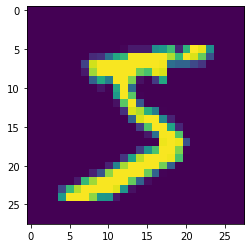

In [ ]:

import matplotlib.pyplot as plt
plt.imshow(images[0])

In [ ]:
logdir = "logs/images/"
file_writer = tf.summary.create_file_writer(logdir + "/mnist")
with file_writer.as_default():
  img = np.reshape(images[0], (-1, 28, 28, 1))
  tf.summary.image("MNIST Image 0", img, step=0)

In [ ]:
%tensorboard --logdir logs


## 3. Hyperparameters

In [ ]:
from tensorboard.plugins.hparams import api as hp

In [ ]:
HP_PARAM1 = hp.HParam('param1', hp.Discrete([1,10,50,100]))
HP_PARAM2 = hp.HParam('param2', hp.RealInterval(0.1, 0.5))
HP_PARAM3 = hp.HParam('param3', hp.Discrete(['option1', 'option2']))

METRIC = 'accuracy'

run_dir = 'logs/hparam'

with tf.summary.create_file_writer(run_dir).as_default():
  hp.hparams_config(
    hparams=[HP_PARAM1, HP_PARAM2, HP_PARAM3],
    metrics=[hp.Metric(METRIC, display_name='Accuracy')],
  )
     

In [ ]:
def store_hparams(run_dir, hparams, accuracy, METRIC):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams) 
    tf.summary.scalar(METRIC, accuracy, step=1)

In [ ]:
session_num=0
for p1 in HP_PARAM1.domain.values:
  for p2 in (HP_PARAM2.domain.min_value, HP_PARAM2.domain.max_value):
    for p3 in HP_PARAM3.domain.values:
      hparams = {
          HP_PARAM1: p1,
          HP_PARAM2: p2,
          HP_PARAM3: p3,
      }
      run_name = "run-%d" % session_num
      store_hparams(run_dir + '/' + run_name, hparams, np.random.randint(10), METRIC)
      session_num += 1

In [ ]:
%tensorboard --logdir logs

## 4. Projector: Inspectig the data and the layer activations 

TensorBoard is a powerful tool to inspect the details of training. TensorBoard project can show you the inner representations of the images and their relation to each other. 

In [ ]:
model.layers

In [ ]:
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model

# defining the model's input
inp = model.input              
# printing all the outputs of the models (layerwise)                         
outputs = [layer.output for layer in model.layers]
print(outputs)

[<KerasTensor: shape=(None, 1024) dtype=float32 (created by layer 'dense')>, <KerasTensor: shape=(None, 1024) dtype=float32 (created by layer 'dropout')>, <KerasTensor: shape=(None, 1024) dtype=float32 (created by layer 'dense_1')>, <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_2')>]


We define two submodels, which has outputs of specific layers:

In [ ]:
submodel_1 = Model(inp, outputs[0])
submodel_2 = Model(inp, outputs[1])

Next, we make a prediction with 500 test samples:

In [ ]:
X_test500 = X_test[:500]
Y_test500 = Y_test[:500]

In [ ]:
pred_1 = submodel_1.predict(X_test500)
pred_2 = submodel_2.predict(X_test500)

16/16 [==============================] - 0s 1ms/step


In [ ]:
pred_1.shape, pred_2.shape

((500, 1024), (500, 1024))

As a next step we write the raw data, and the layer activations for these raw data to TensorBoard. We use the TensorBoardX module, which we need to install (if not installed):

In [ ]:
!pip install tensorboardX

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 KB 4.8 MB/s eta 0:00:00


In [ ]:
original_test_imgs500 = (mean.reshape(32,32,3)+std.reshape(32,32,3)*X_test500.reshape(500,32,32,3)).astype(int)/255.0

In [ ]:
np.argmax(Y_test500,1).shape

(500,)

In [ ]:
logdir = 'logs/'
from tensorboardX import SummaryWriter

with SummaryWriter(logdir+'/projector/raw_data') as w:
  w.add_embedding(X_test500, metadata=np.argmax(Y_test500,1).reshape(-1,1), label_img=original_test_imgs500.transpose(0,3,1,2), global_step=0)

with SummaryWriter(logdir+'/projector/submodel_1') as w:
  w.add_embedding(pred_1, metadata=np.argmax(Y_test500,1).reshape(-1,1), label_img=original_test_imgs500.transpose(0,3,1,2), global_step=0)

with SummaryWriter(logdir+'/projector/submodel_2') as w:
  w.add_embedding(pred_2, metadata=np.argmax(Y_test500,1).reshape(-1,1), label_img=original_test_imgs500.transpose(0,3,1,2), global_step=0)


As a last step, lets inspect the results with TensorBoard Projector. If the Projector menu doesn't apper, then select it from the "Inactive" menu:

In [ ]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
#!rm logs -r

In [ ]:
%tensorboard --logdir logs

# Exercise
Train a convolutional neural network on CIFAR-10 (eg. the one you submitted), produce the activations of the last layer before the output layer for the same 500 images, and inspect the vectors with t-SNE and UMAP.

In [ ]:
#06-ban